# Plot Mackenzie at Arctic Red River Data, 1972-2025

Data are downloaded from the Arctic Great Rivers Observatory here: https://arcticgreatrivers.org/discharge/

Main website here: https://arcticgreatrivers.org/

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# Read the Excel spreadsheet
# replace "discharge_data.xlsx" with your filename
df = pd.read_excel("/Users/mzahn/data/McFLURRIE/runoff/Mackenzie_ArcticRedRiver_Version_20250327.xlsx")

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert discharge to numeric (turns "NA" into NaN automatically)
df['discharge'] = pd.to_numeric(df['discharge'], errors='coerce')

In [7]:
# Create an xarray DataArray
discharge_da = xr.DataArray(
    df['discharge'].values,
    coords={"time": df['date'].values},
    dims=["time"],
    name="discharge"
)

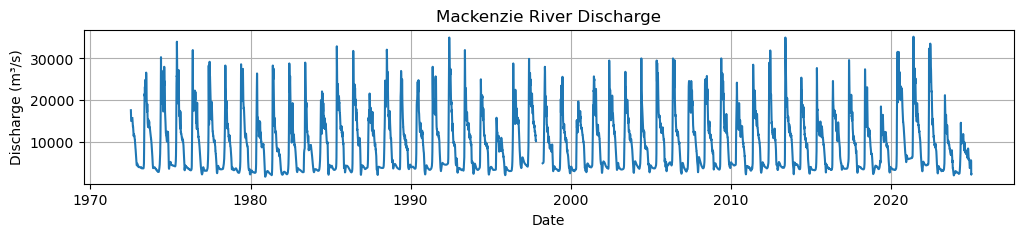

In [17]:
# Plot using xarray’s built-in plot (matplotlib under the hood)
discharge_da.plot.line(figsize=(12, 2))

plt.title("Mackenzie River Discharge")
plt.xlabel("Date")
plt.ylabel("Discharge (m³/s)")
plt.grid(True)
plt.show()

### Plot only time period for ECCO data

In [22]:
discharge_da.time

<xarray.DataArray 'time' (time: 19288)> Size: 154kB
array(['1972-03-21T00:00:00.000000000', '1972-03-22T00:00:00.000000000',
       '1972-03-23T00:00:00.000000000', ..., '2025-01-07T00:00:00.000000000',
       '2025-01-08T00:00:00.000000000', '2025-01-09T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 154kB 1972-03-21 1972-03-22 ... 2025-01-09

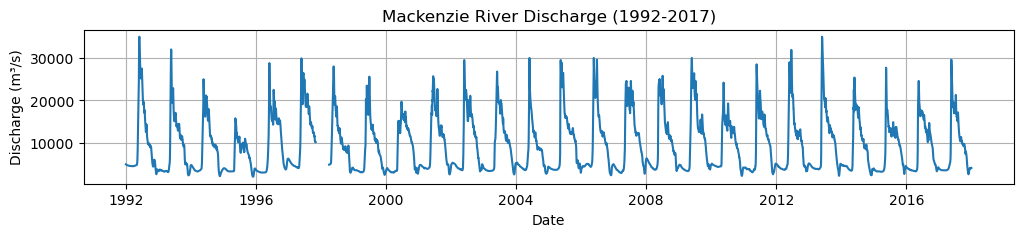

In [28]:
# Plot using xarray’s built-in plot (matplotlib under the hood)
discharge_da.sel(time=slice('1992','2017')).plot.line(figsize=(12, 2))

plt.title("Mackenzie River Discharge (1992-2017)")
plt.xlabel("Date")
plt.ylabel("Discharge (m³/s)")
plt.grid(True)
plt.show()

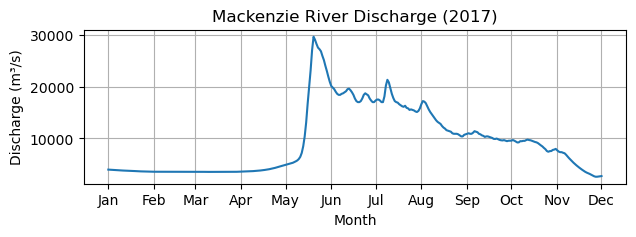

In [63]:
# Plot using xarray’s built-in plot (matplotlib under the hood)
discharge_da.sel(time=slice('2017-01-01','2017-12-01')).plot.line(figsize=(7, 2))

plt.title("Mackenzie River Discharge (2017)")

# Set the month names as x-axis labels
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=pd.date_range("2017-01-01", "2017-12-31", freq="MS"), labels=month_names)

plt.xlabel("Month")
plt.ylabel("Discharge (m³/s)")
plt.grid(True)
plt.show()

### Now add climatology used in ECCOv4r4

In [65]:
# tell Python to use the ecco_v4_py in the 'ECCOv4-py' repository
from os.path import join,expanduser
import sys
import glob
import os

# identify user's home directory
user_home_dir = expanduser('~')

# add ECCOv4-py to sys.path
ecco_path = join(user_home_dir, 'github_others', 'ECCOv4-py')
sys.path.insert(0, ecco_path)

# import the ECCOv4 py library
import ecco_v4_py as ecco

In [67]:
# open grid file
ecco_grid = xr.open_dataset('/Users/mzahn/data/grids/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc')

In [69]:
# define directory to runoff file
runoff_dir = '/Users/mzahn/data/McFLURRIE/runoff/'
fname = 'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin'

In [71]:
runoff = ecco.read_llc_to_tiles(runoff_dir, fname, nl=12)

load_binary_array: loading file /Users/mzahn/data/McFLURRIE/runoff/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [73]:
# specify that the 5th dimension should be time
runoff_da = ecco.llc_tiles_to_xda(runoff, var_type='c',dim4='depth', dim5='time')
runoff_da

<xarray.DataArray (time: 12, k: 1, tile: 13, j: 90, i: 90)> Size: 5MB
array([[[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           1.26561770e-16, 3.13431572e-16, 5.19351952e-16],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           8.92115118e-18, 2.04158267e-17, 4.71840994e-17],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           1.22618992e-19, 1.26657027e-18, 2.35088576e-18]],

         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 5.77010378e-21, 1.19469308e-19],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [3.49937988e-13, 9.47915574e-13, 1.97739915e-12, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [6.50678716e-14, 1.75406849e-13, 4.32180198e-13, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]]],
      dtype='>f4')
Coordinates:
  * k        (k) int64 8B 0
  * time     (time) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * tile     (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i        (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89

In [75]:
# mask out land
runoff_masked = runoff_da.where(ecco_grid.hFacC)

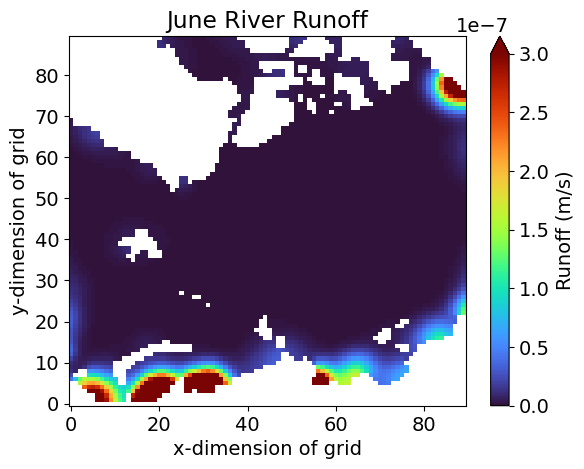

In [77]:
plt.rcParams['font.size'] = 14
runoff_masked.isel(tile=6,time=5).plot(vmin=0,vmax=3e-7,cmap='turbo',cbar_kwargs={'label': 'Runoff (m/s)'});
plt.ylabel('y-dimension of grid')
plt.xlabel('x-dimension of grid')
plt.title('June River Runoff');

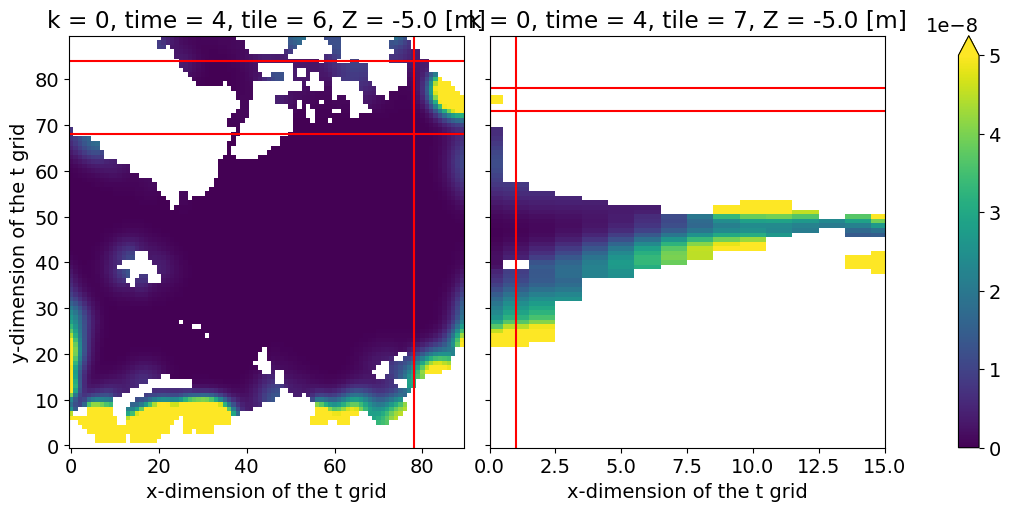

In [81]:
# plot just mackenzie region to isolate box to increase by 10%
fig, (ax1,ax2) = plt.subplots(1,2,figsize=[10,5],layout='constrained',sharey=True)
runoff_masked.isel(tile=6,time=4).plot(ax=ax1,vmin=0,vmax=5e-8,add_colorbar=False);
runoff_masked.isel(tile=7,time=4).plot(ax=ax2,vmin=0,vmax=5e-8);
ax2.set_ylabel("");

# box for tile 6
ax1.axhline(y=68,color='r')
ax1.axhline(y=84,color='r')
ax1.axvline(x=78,color='r')
ax1.axvline(x=90,color='r');

# box for tile 7
ax2.axhline(y=73,color='r')
ax2.axhline(y=78,color='r')
ax2.axvline(x=0,color='r')
ax2.axvline(x=1,color='r');

ax2.set_xlim(0,15);
# ax2.ylim(65,85);

In [87]:
# box for zero-indexed tile 6 (Arctic tile)

# Define the box by index ranges
i_start, i_end = 78, 90
j_start, j_end = 68, 84

# Make a copy to modify (if needed)
runoff_mack = runoff_masked.loc[dict(i=slice(i_start, i_end), j=slice(j_start, j_end))]

In [89]:
runoff_mack

<xarray.DataArray (time: 12, k: 1, tile: 13, j: 17, i: 12)> Size: 127kB
array([[[[[4.25640145e-09, 4.43912995e-09, 4.62302152e-09, ...,
           0.00000000e+00,            nan,            nan],
          [3.97744371e-09, 4.16993817e-09, 4.36694414e-09, ...,
           5.83299409e-09,            nan,            nan],
          [3.42691409e-09, 3.86978227e-09, 4.01660616e-09, ...,
           5.65250158e-09, 5.75834802e-09, 0.00000000e+00],
          ...,
          [5.69376324e-10, 5.87075000e-10, 6.20995533e-10, ...,
           7.57217788e-10, 8.19810553e-10, 8.17494794e-10],
          [4.68990735e-10, 4.99079278e-10, 5.13284470e-10, ...,
           6.17769391e-10, 6.61479316e-10, 6.58943178e-10],
          [6.84539859e-21, 1.41754135e-19, 1.46438648e-18, ...,
           8.60441885e-14, 1.42096485e-13, 2.09091655e-13]],

         [[1.91866545e-09, 1.60692804e-09, 1.28414424e-09, ...,
           2.50683606e-11, 1.06368993e-11, 4.52496677e-12],
          [           nan, 1.28182476e-09, 1.13925047e-09, ...,
           3.77503445e-11, 1.53564106e-11, 5.47926331e-12],
          [           nan, 1.20508181e-09, 1.20748000e-09, ...,
           7.03227546e-11, 2.94708147e-11, 1.09637516e-11],
...
           4.39440005e-16, 1.14161857e-16, 0.00000000e+00],
          [5.72556833e-15, 8.15617850e-15, 8.29091180e-15, ...,
           6.43193807e-17, 0.00000000e+00, 0.00000000e+00],
          [1.05840335e-15, 1.28255961e-15, 1.59727925e-15, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

         [[           nan,            nan,            nan, ...,
                      nan,            nan,            nan],
          [           nan,            nan,            nan, ...,
                      nan,            nan,            nan],
          [           nan,            nan,            nan, ...,
                      nan,            nan,            nan],
          ...,
          [           nan,            nan,            nan, ...,
                      nan,            nan,            nan],
          [           nan,            nan,            nan, ...,
                      nan,            nan,            nan],
          [           nan,            nan,            nan, ...,
                      nan,            nan,            nan]]]]],
      dtype=float32)
Coordinates:
  * k        (k) int64 8B 0
  * time     (time) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * tile     (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 136B 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
  * i        (i) int64 96B 78 79 80 81 82 83 84 85 86 87 88 89
    XC       (tile, j, i) float32 11kB ...
    YC       (tile, j, i) float32 11kB ...
    Z        (k) float32 4B ...

In [93]:
# select Mackenzie River portion
runoff_mack_clim = (runoff_da.isel(tile=6,k=0,i=slice(i_start, i_end), j=slice(j_start, j_end)).sum(dim=['i','j']) + \
                    runoff_da.isel(tile=7,k=0,i=slice(0, 2), j=slice(73, 79)).sum(dim=['i','j']))

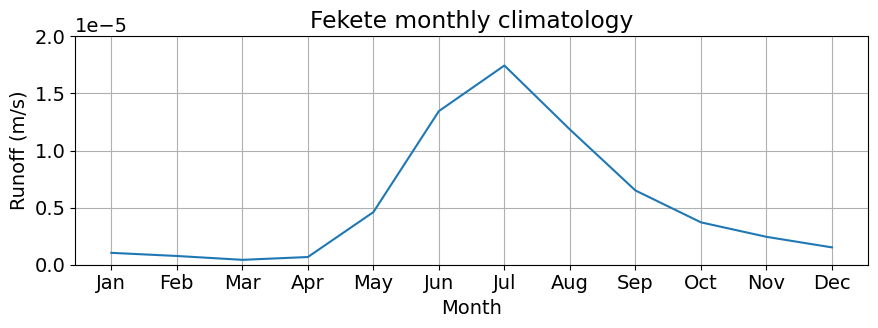

In [99]:
runoff_mack_clim.plot(label='runoff climatology', figsize=[9, 3.5]);
# plt.legend(loc='upper left',fontsize=10);

# Set the month names as x-axis labels
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=range(len(month_names)), labels=month_names)
# plt.yticks([0,5e-5,10e-5])
plt.ylim(0,2e-5)

# labels
plt.grid()
plt.xlabel('Month')
plt.title("Fekete monthly climatology")
plt.ylabel("Runoff (m/s)")
# plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

In [105]:
# Select grid cell runoff (m/s) and multiply by grid cell area (m²)
# This gives discharge contribution per cell (m³/s)

runoff_mack_clim = (
    (runoff_da.isel(tile=6, k=0, i=slice(i_start, i_end), j=slice(j_start, j_end))
     * ecco_grid.rA.isel(tile=6, i=slice(i_start, i_end), j=slice(j_start, j_end))
    ).sum(dim=['i','j'])
    +
    (runoff_da.isel(tile=7, k=0, i=slice(0, 2), j=slice(73, 79))
     * ecco_grid.rA.isel(tile=7, i=slice(0, 2), j=slice(73, 79))
    ).sum(dim=['i','j'])
)

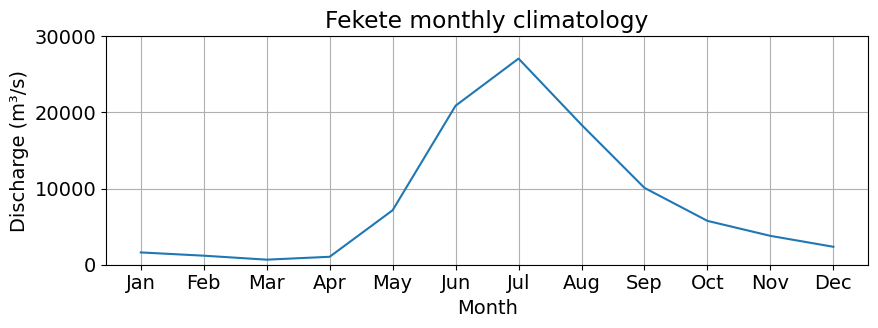

In [113]:
runoff_mack_clim.plot(label='runoff climatology', figsize=[9, 3.5]);
# plt.legend(loc='upper left',fontsize=10);

# Set the month names as x-axis labels
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=range(len(month_names)), labels=month_names)
# plt.yticks([0,5e-5,10e-5])
plt.ylim(0,30000)

# labels
plt.grid()
plt.xlabel('Month')
plt.title("Fekete monthly climatology")
plt.ylabel("Discharge (m³/s)")
# plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()

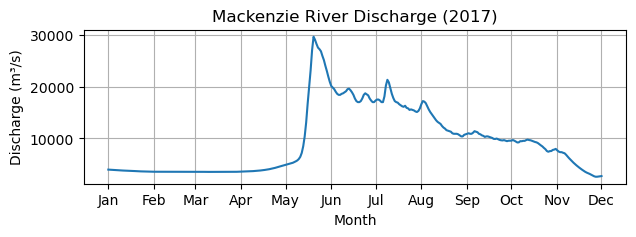

In [63]:
# Plot using xarray’s built-in plot (matplotlib under the hood)
discharge_da.sel(time=slice('2017-01-01','2017-12-01')).plot.line(figsize=(7, 2))

plt.title("Mackenzie River Discharge (2017)")

# Set the month names as x-axis labels
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(ticks=pd.date_range("2017-01-01", "2017-12-31", freq="MS"), labels=month_names)

plt.xlabel("Month")
plt.ylabel("Discharge (m³/s)")
plt.grid(True)
plt.show()

In [118]:
import numpy as np

/Users/mzahn/miniforge3/envs/sassie/lib/python3.11/site-packages/xarray/groupers.py:490: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


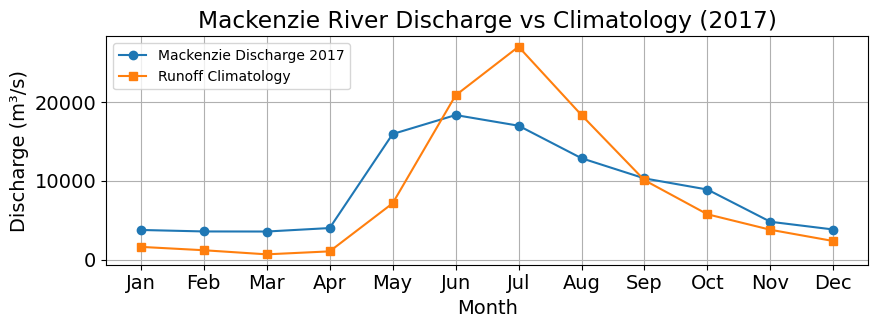

In [120]:
# Extract the 2017 daily discharge and compute monthly means
discharge_2017 = discharge_da.sel(time=slice('2017-01-01','2017-12-31'))
discharge_monthly = discharge_2017.resample(time="1M").mean()

# Align climatology (assumed to be 12 monthly values)
months = np.arange(1, 13)  # 1=Jan, ..., 12=Dec

# Plot
plt.figure(figsize=(9, 3.5))

# Plot 2017 discharge
plt.plot(discharge_monthly['time'].dt.month, discharge_monthly,
         label="Mackenzie Discharge 2017", marker="o")

# Plot climatology
plt.plot(months, runoff_mack_clim, label="Runoff Climatology", marker="s")

# Format x-axis with month names
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
               'Sep','Oct','Nov','Dec']
plt.xticks(ticks=months, labels=month_names)

# Labels, title, grid
plt.xlabel("Month")
plt.ylabel("Discharge (m³/s)")
plt.title("Mackenzie River Discharge vs Climatology (2017)")
plt.grid(True)
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()